# Statistiche questionari utente

In [1]:
# Assicuratevi di installare le librerie opportune nell'environment qui sotto.
import sys
print(sys.executable)


/home/moeasy/.pyenv/versions/3.9.5/bin/python3.9


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np, scipy.stats as st
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Patch
from scipy.stats import wilcoxon


from IPython.display import display, HTML

# palette colori:
# palette_c = ['#ceddf0', '#94cce7', '#21a2d0', '#128aa3', '#1c62ba']
palette_c = ['#ceddf0', '#e52e03', '#21a2d0', '#fe6c00', '#1c62ba'] # Colori Giosu e Gab

app = ['AliExpress', 'Temu']

questionario1 = pd.read_csv('Questionario ' + app[0] + '.csv', index_col = 0)
questionario2 = pd.read_csv('Questionario ' + app[1] + '.csv', index_col = 0)
display(questionario1.head(32))
print('\n________________________________________\n')
display(questionario2.head(32))

,ED1,ED2,ED3,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21
genere,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina,...,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina
eta,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
situazione lavorativa,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente,...,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente
istruzione,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,...,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale
fastidioso-piacevole,4,3,5,6,2,6,5,2,4,3,...,4,2,3,4,4,5,5,4,6,1
incomprensibile-comprensibile,5,4,5,5,4,2,5,6,4,3,...,3,2,5,3,5,5,5,5,6,4
creativo-privo di fantasia,3,4,3,3,4,4,4,2,4,7,...,7,4,6,4,5,4,4,6,1,7
facile da apprendere-difficile da apprendere,4,3,4,2,4,2,2,2,5,5,...,4,3,1,2,2,4,3,3,2,2
di grande valore-di poco valore,6,3,3,4,6,3,4,6,5,6,...,7,4,6,4,3,4,4,5,3,7
noioso-appassionante,4,5,5,6,4,5,5,2,4,4,...,3,4,2,2,4,4,4,2,5,1



________________________________________



,ED1,ED2,ED3,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21
genere,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina,...,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina,Maschio,Femmina
eta,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
situazione lavorativa,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente,...,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente,Studente
istruzione,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,...,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale,Laurea Triennale
fastidioso-piacevole,1,5,3,3,1,6,5,1,4,4,...,5,3,6,5,3,5,5,5,7,1
incomprensibile-comprensibile,2,5,3,3,7,4,6,7,4,4,...,4,3,3,6,4,5,4,5,7,4
creativo-privo di fantasia,4,4,5,4,3,4,2,1,4,5,...,7,4,2,6,2,4,5,4,1,2
facile da apprendere-difficile da apprendere,5,3,5,2,1,2,1,2,3,5,...,4,6,1,4,4,3,2,3,1,2
di grande valore-di poco valore,6,3,5,4,7,4,2,7,4,5,...,7,3,4,4,4,4,4,4,3,7
noioso-appassionante,4,4,3,3,3,5,6,1,6,3,...,2,4,4,4,5,4,3,4,7,4


## General stats:



Gender stats


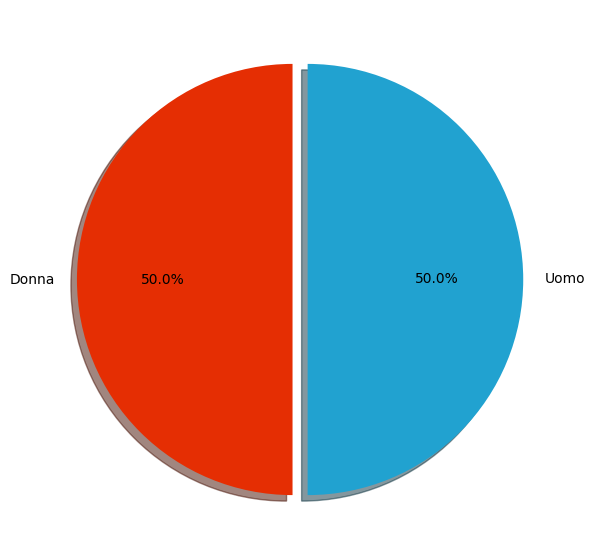



Job stats


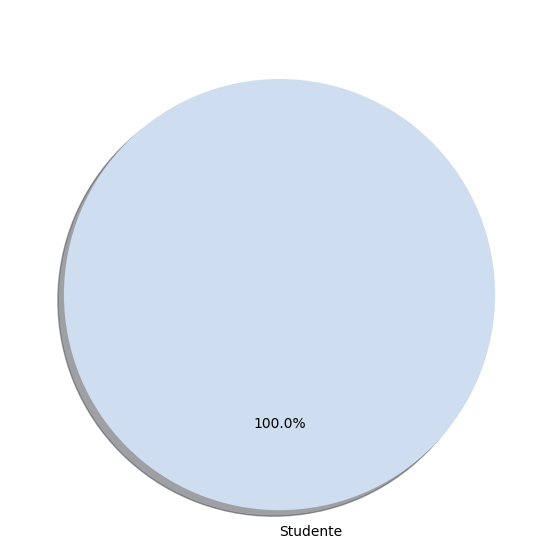



Education stats


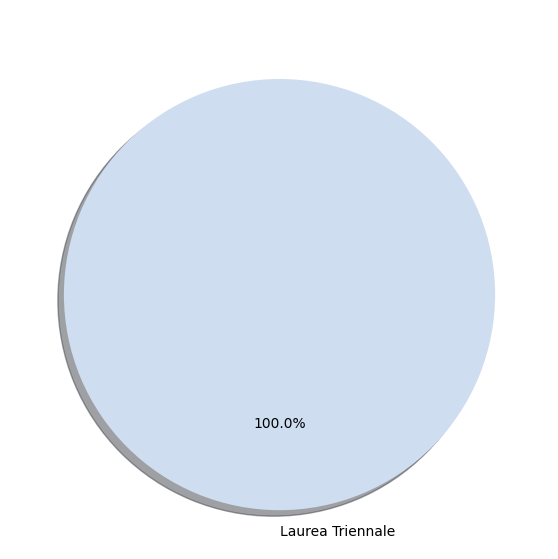



Age stats


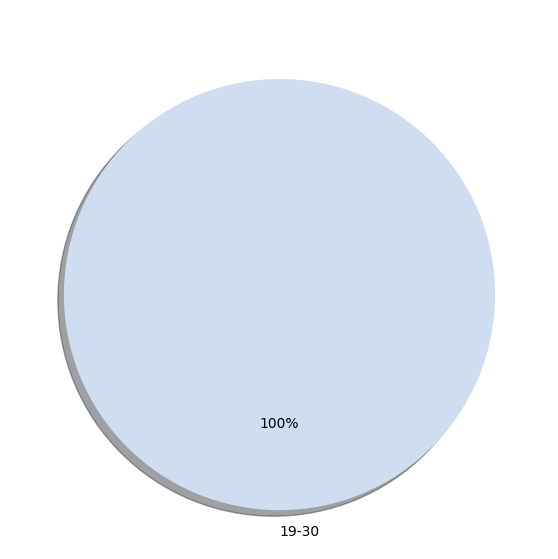

In [3]:
# gender stats
print('\n\nGender stats')
labels = ['Donna', 'Uomo']
sizes = questionario1.loc['genere'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c[1:3])
plt.show()


# job stats
print('\n\nJob stats')
labels = questionario1.loc['situazione lavorativa'].value_counts().index
sizes = questionario1.loc['situazione lavorativa'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()



# education stats
print('\n\nEducation stats')
labels = questionario1.loc['istruzione'].value_counts().index
sizes = questionario1.loc['istruzione'].value_counts()

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()


# age stats
print('\n\nAge stats')
age_class = [10, 18, 30, 45, 60, 110]
labels = ['10-18', '19-30', '31-45', '46-60', '60+']
etas = [int(ele) for ele in questionario1.loc['eta']]
df_age = pd.DataFrame({'age': etas, 'group': pd.cut(etas, bins = age_class, labels = labels, right=False)})

sizes = df_age['group'].value_counts()
sizes = sizes[sizes != 0] # drop 0 value
labels = list(sizes.index)

# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes))
explode[np.where(sizes.index == sizes.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.0f%%', shadow = True, startangle = 90, colors = palette_c)
plt.show()



## Per ogni domanda vengono mostrate min, max, media, mediana, std e un boxplot riassuntivo e comparativo tra i due sistemi

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,6.0,4.041667,1.45898,4.0,"[3.426, 4.658]",+/- 0.616
Temu,1.0,7.0,3.875,1.752328,4.5,"[3.135, 4.615]",+/- 0.74


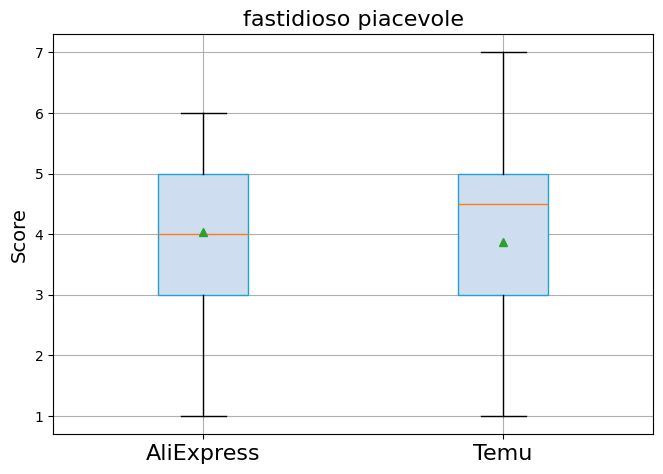

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,2.0,7.0,4.416667,1.212854,5.0,"[3.905, 4.929]",+/- 0.512
Temu,2.0,7.0,4.583333,1.380506,4.0,"[4.0, 5.166]",+/- 0.583


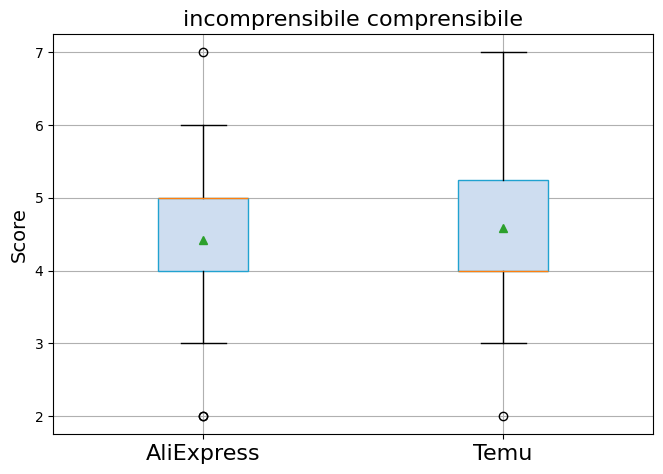

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,7.0,4.25,1.621862,4.0,"[3.565, 4.935]",+/- 0.685
Temu,1.0,7.0,3.75,1.481773,4.0,"[3.124, 4.376]",+/- 0.626


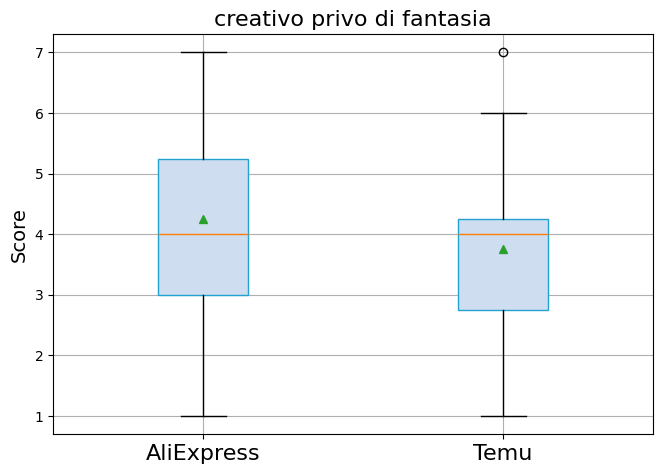

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,5.0,2.916667,1.059806,3.0,"[2.469, 3.364]",+/- 0.447
Temu,1.0,6.0,2.958333,1.488482,3.0,"[2.33, 3.587]",+/- 0.629


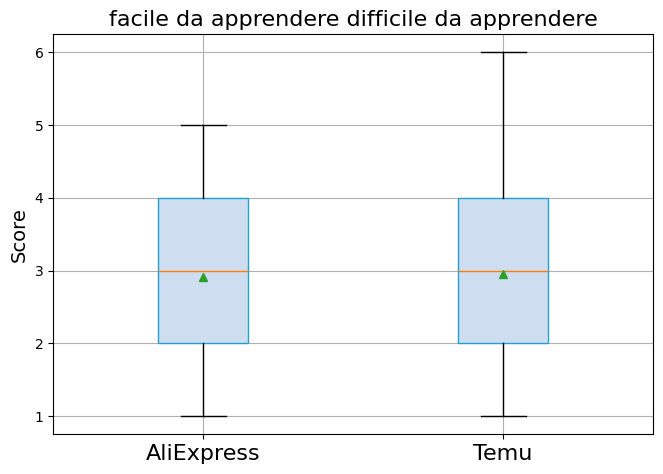

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,2.0,7.0,4.5,1.383128,4.0,"[3.916, 5.084]",+/- 0.584
Temu,2.0,7.0,4.458333,1.503016,4.0,"[3.824, 5.093]",+/- 0.635


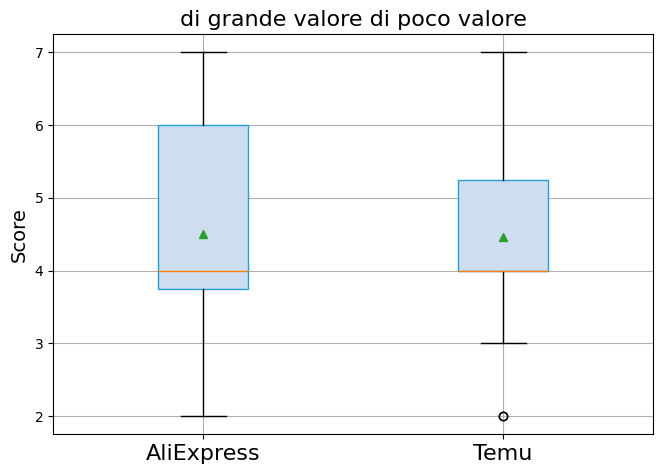

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,6.0,3.958333,1.334465,4.0,"[3.395, 4.522]",+/- 0.564
Temu,1.0,7.0,4.0,1.285369,4.0,"[3.457, 4.543]",+/- 0.543


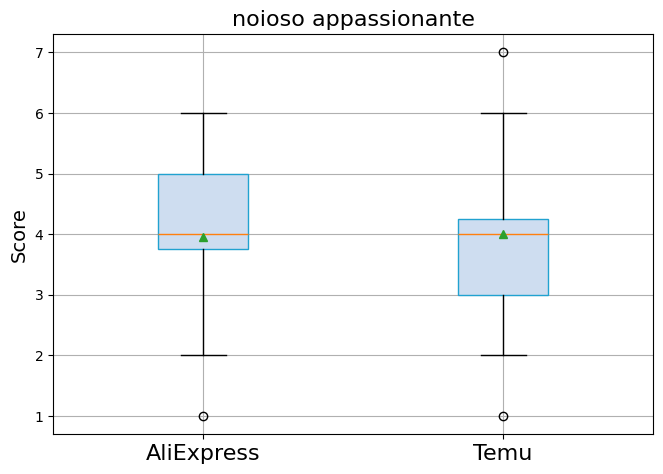

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,2.0,7.0,4.041667,1.267629,4.0,"[3.506, 4.577]",+/- 0.535
Temu,1.0,7.0,3.958333,1.45898,4.0,"[3.342, 4.574]",+/- 0.616


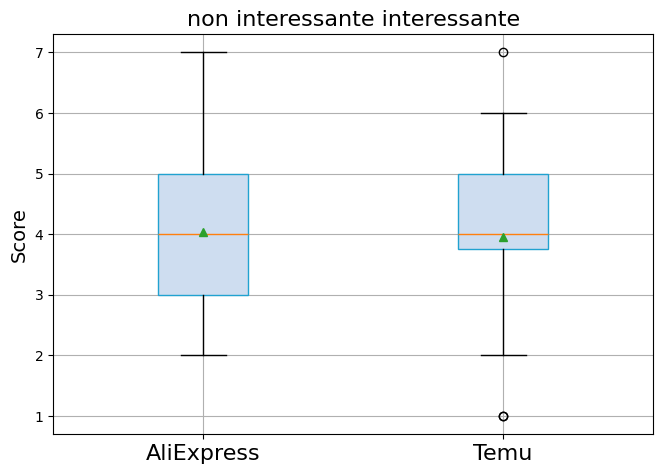

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,6.0,3.75,1.51083,4.0,"[3.112, 4.388]",+/- 0.638
Temu,1.0,7.0,4.291667,1.517411,4.0,"[3.651, 4.932]",+/- 0.64


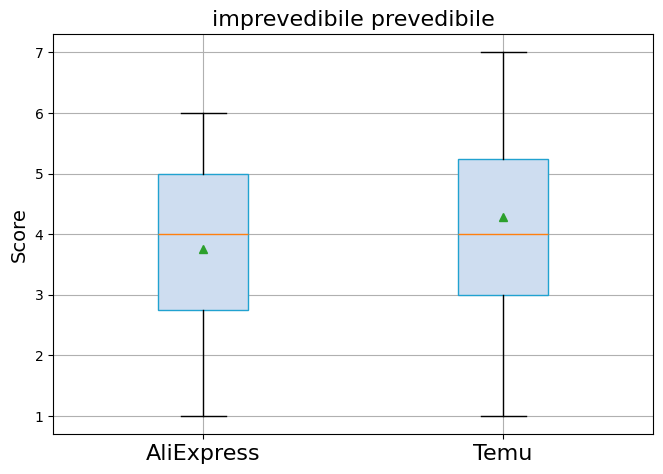

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,2.0,6.0,3.708333,1.232853,4.0,"[3.188, 4.229]",+/- 0.521
Temu,1.0,5.0,3.041667,1.267629,3.0,"[2.506, 3.577]",+/- 0.535


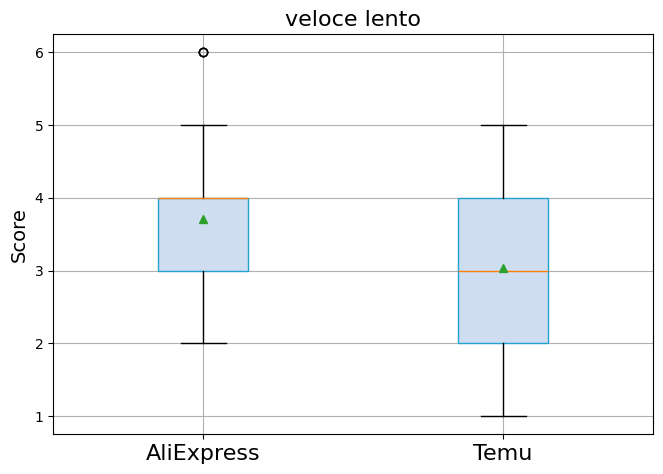

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,7.0,4.416667,1.815792,4.5,"[3.65, 5.183]",+/- 0.766
Temu,1.0,7.0,3.916667,1.558055,4.0,"[3.259, 4.575]",+/- 0.658


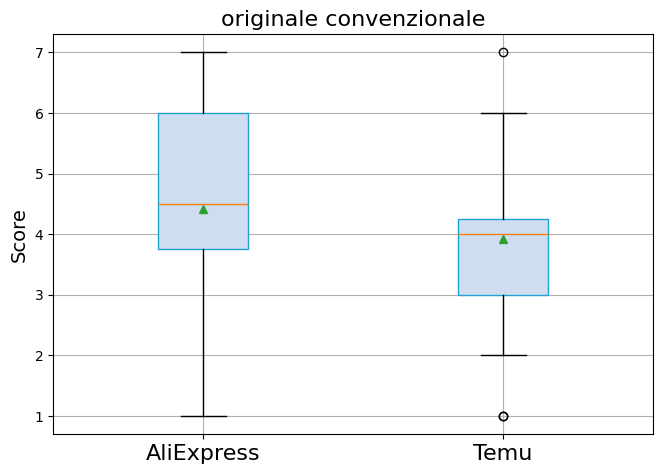

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,2.0,7.0,4.125,1.226962,4.0,"[3.607, 4.643]",+/- 0.518
Temu,1.0,7.0,4.208333,1.53167,4.0,"[3.562, 4.855]",+/- 0.647


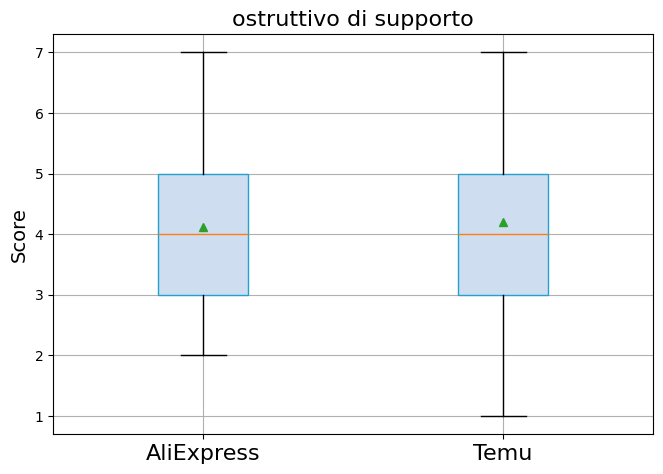

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,2.0,7.0,4.166667,1.34056,4.0,"[3.601, 4.733]",+/- 0.566
Temu,1.0,7.0,4.0,1.503619,4.0,"[3.365, 4.635]",+/- 0.635


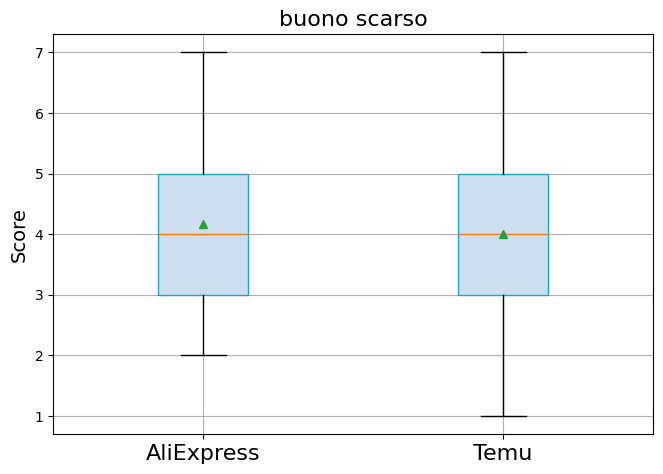

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,2.0,7.0,4.666667,1.434563,4.5,"[4.061, 5.272]",+/- 0.605
Temu,3.0,7.0,4.958333,1.45898,5.0,"[4.342, 5.574]",+/- 0.616


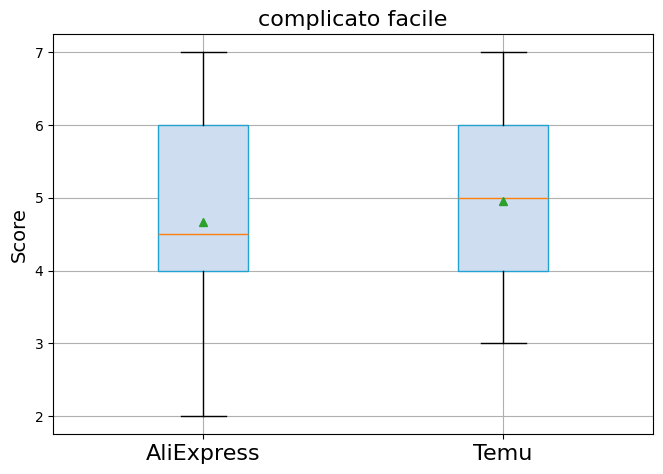

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,7.0,4.125,1.623536,4.0,"[3.439, 4.811]",+/- 0.686
Temu,1.0,7.0,4.25,1.893926,4.0,"[3.45, 5.05]",+/- 0.8


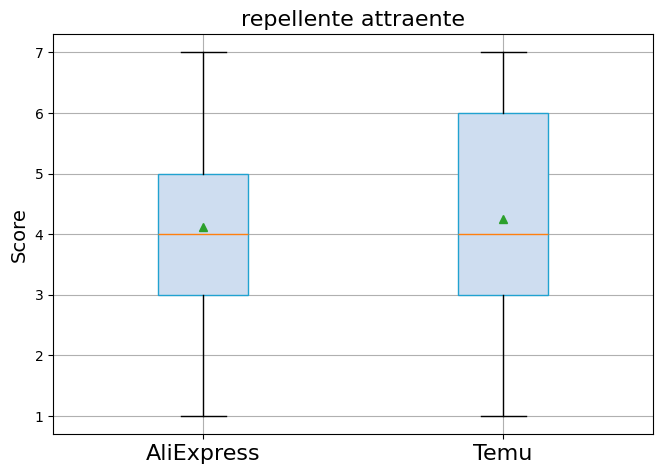

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,6.0,4.291667,1.267629,4.0,"[3.756, 4.827]",+/- 0.535
Temu,2.0,7.0,4.583333,1.316011,5.0,"[4.028, 5.139]",+/- 0.556


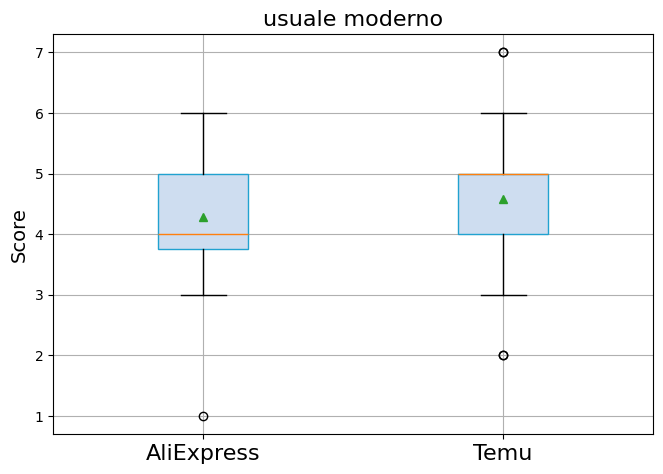

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,7.0,4.0,1.587998,4.0,"[3.329, 4.671]",+/- 0.671
Temu,1.0,7.0,3.958333,1.627993,4.0,"[3.271, 4.646]",+/- 0.688


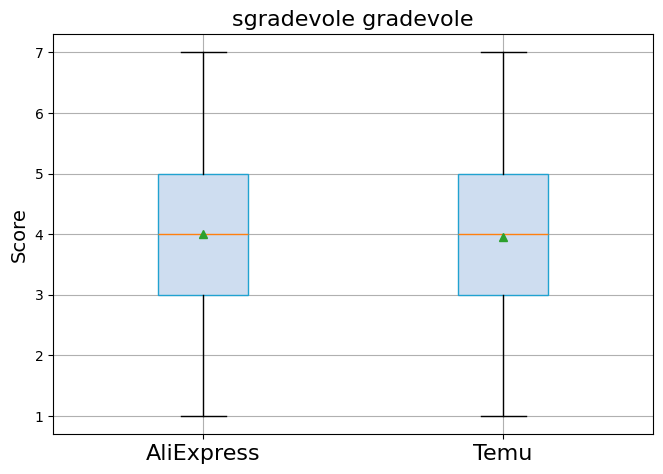

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,6.0,4.083333,1.138904,4.0,"[3.602, 4.564]",+/- 0.481
Temu,1.0,6.0,4.041667,1.334465,4.0,"[3.478, 4.605]",+/- 0.563


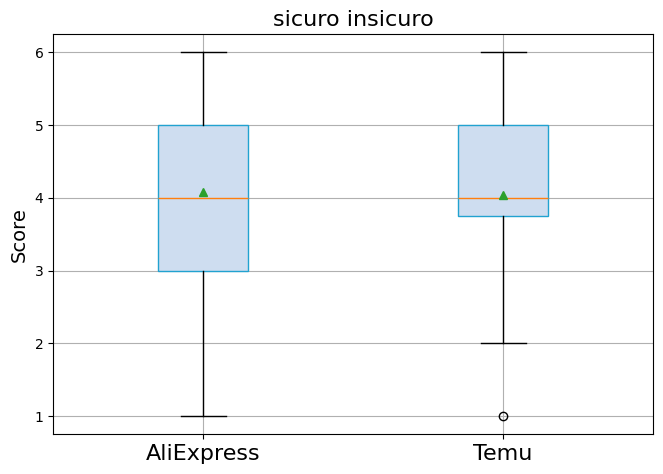

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,7.0,3.625,1.408437,4.0,"[3.03, 4.22]",+/- 0.595
Temu,1.0,6.0,3.458333,1.284664,4.0,"[2.916, 4.001]",+/- 0.543


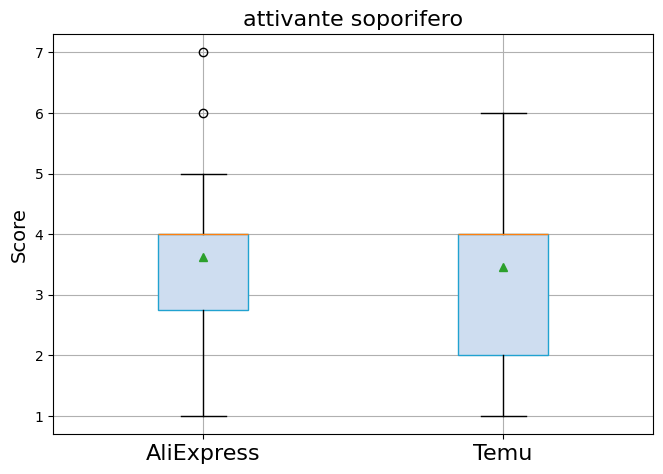

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,6.0,3.041667,1.398109,3.0,"[2.451, 3.632]",+/- 0.59
Temu,1.0,6.0,2.833333,1.307725,3.0,"[2.281, 3.386]",+/- 0.553


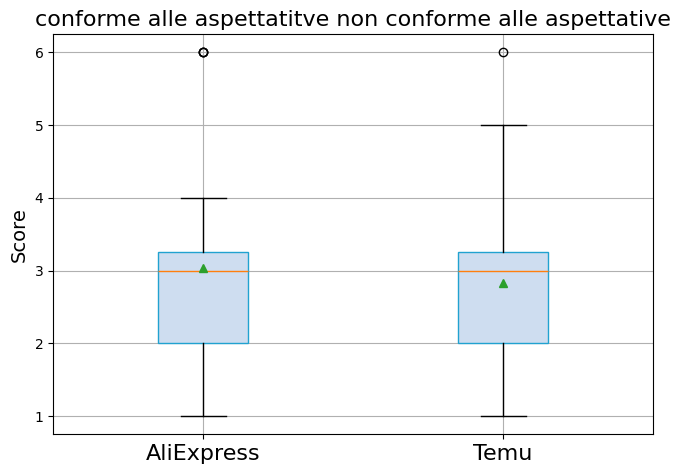

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,7.0,4.333333,1.551063,4.0,"[3.678, 4.988]",+/- 0.655
Temu,2.0,6.0,4.375,1.209114,4.0,"[3.864, 4.886]",+/- 0.511


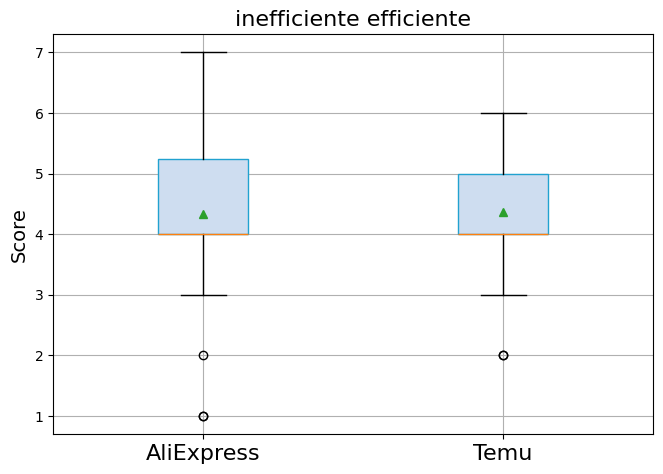

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,2.0,7.0,4.208333,1.444003,4.0,"[3.599, 4.818]",+/- 0.61
Temu,1.0,7.0,3.666667,1.685402,4.0,"[2.955, 4.378]",+/- 0.711


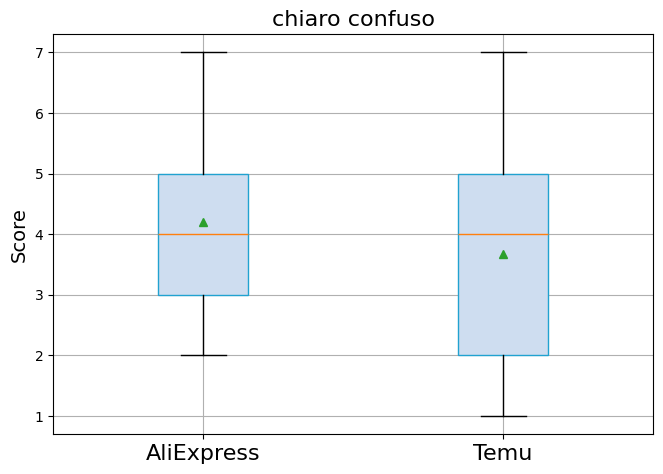

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,2.0,6.0,4.458333,0.977093,4.0,"[4.046, 4.871]",+/- 0.413
Temu,2.0,7.0,4.25,1.481773,4.0,"[3.624, 4.876]",+/- 0.626


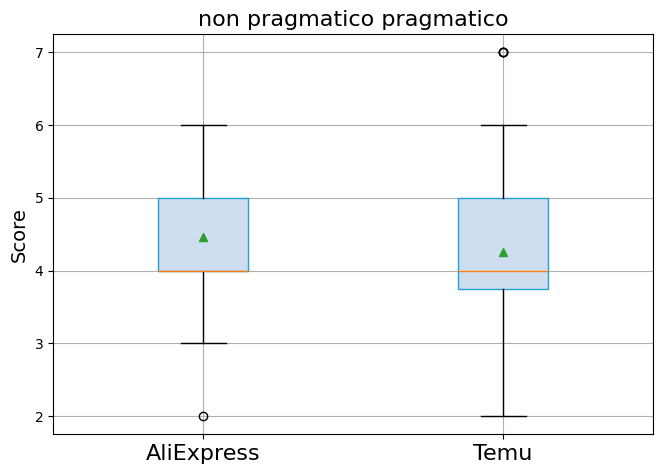

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,2.0,7.0,5.458333,1.614585,6.0,"[4.777, 6.14]",+/- 0.682
Temu,1.0,7.0,4.791667,1.768791,5.0,"[4.045, 5.539]",+/- 0.747


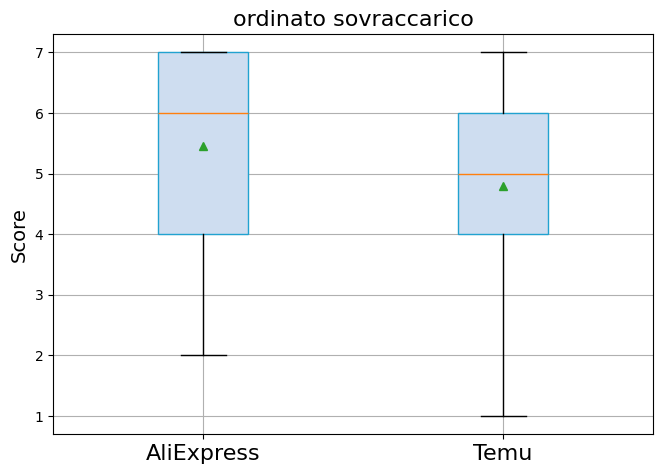

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,7.0,4.375,1.526932,4.0,"[3.73, 5.02]",+/- 0.645
Temu,1.0,7.0,4.041667,1.781039,4.0,"[3.29, 4.794]",+/- 0.752


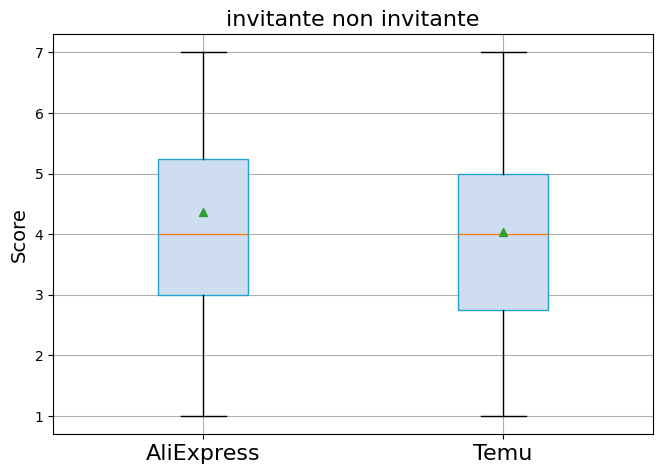

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,2.0,5.0,3.625,1.095941,4.0,"[3.162, 4.088]",+/- 0.463
Temu,2.0,7.0,3.833333,1.239448,4.0,"[3.31, 4.357]",+/- 0.524


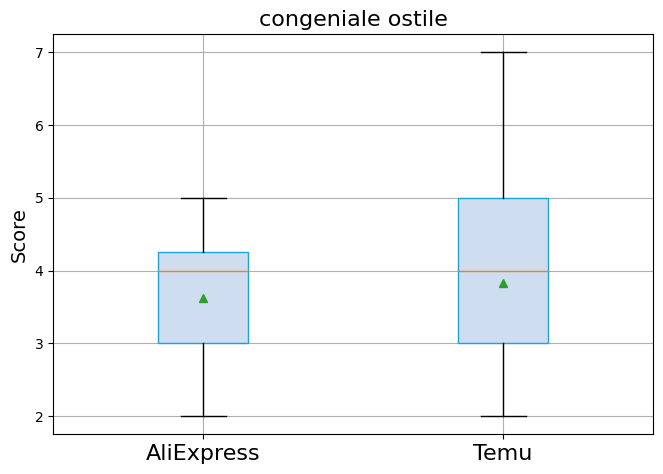

,Min,Max,Media,Std,Mediana,Intervallo (0.95),Error
AliExpress,1.0,7.0,4.25,1.481773,4.0,"[3.624, 4.876]",+/- 0.626
Temu,2.0,7.0,4.625,1.279011,5.0,"[4.085, 5.165]",+/- 0.54


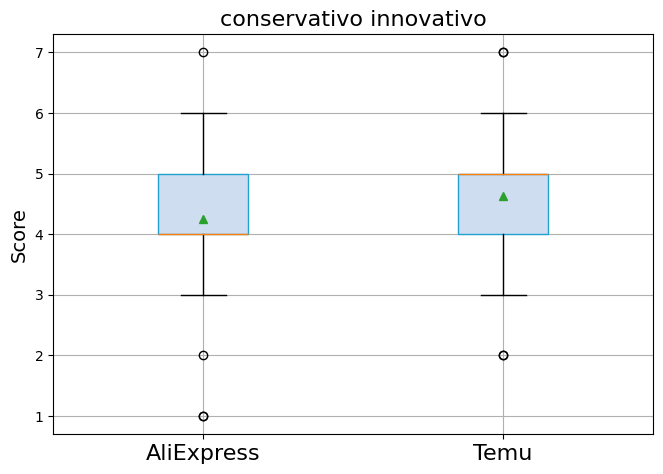

In [4]:
domande1 = questionario1[4:len(questionario1)-1]
domande2 = questionario2[4:len(questionario1)-1]

for index, row in domande1.iterrows():
    quest = domande1.loc[index].to_frame()
    quest = quest.join(domande2.loc[index], lsuffix = '-' + app[0], rsuffix = '-' + app[1])
    quest.columns = app
    quest = quest.astype('float')

    stats = pd.DataFrame(index=app, columns=['Min', 'Max', 'Media', 'Std', 'Mediana', 'Intervallo (0.95)', 'Error'])
    for ele in app:
        stats.loc[ele, 'Min'] = quest[ele].min()
        stats.loc[ele, 'Max'] = quest[ele].max()
        stats.loc[ele, 'Media'] = quest[ele].mean()
        stats.loc[ele, 'Std'] = quest[ele].std()
        stats.loc[ele, 'Mediana'] = quest[ele].median()
        stats.loc[ele, 'Intervallo (0.95)'] = np.around(st.t.interval(0.95, len(quest[ele])-1, loc = np.mean(quest[ele]), scale = st.sem(quest[ele])), 3)
        stats.loc[ele, 'Error'] = '+/- ' + str(np.around(stats.loc[ele, 'Intervallo (0.95)'][1] - stats.loc[ele, 'Media'], 3))
    display(stats)
    print()

    fig = plt.figure(figsize = (6, 4), dpi = 100)
    ax = fig.add_axes([0, 0, 1, 1])
    bp = ax.boxplot(quest, patch_artist=True, widths = 0.3, showmeans=True)

    for box in bp['boxes']:
        # change outline color
        # box.set(color='#7570a3')
        box.set(facecolor = palette_c[0])
        box.set(edgecolor = palette_c[2], linewidth=1)
        # fill with colors
        
    #bp['boxes'][0].set(color = palette_c[1])
    #bp['boxes'][1].set(color = palette_c[2])
    plt.grid()
    plt.ylabel('Score', fontsize = 14)
    ax.set_xticklabels(quest.columns, fontsize = 16)
    # title = 
    plt.title(' '.join(index.split('-')), fontsize = 16)
    plt.show()
    

    print('\n\n\n\n\n\n')

In [5]:


print(f'H0: Non ci sono differenze statisticamente significative tra statistica di {app[0]} e statistica di {app[1]}\n\n')

def perform_wilcoxon(test):
    print(f'Wilcoxon test on {test}:')
    x = [int(x) for x in domande1.loc[test].tolist()]
    # x = [5, 5, 5, 6, 4, 5, 2, 3, 4, 2, 3, 2, 5, 5, 5, 4, 3, 4, 7, 6, 6, 5, 5, 5]
    y = [int(x) for x in domande2.loc[test].tolist()]
    # y = [6, 5, 6, 6, 4, 7, 5, 7, 4, 5, 5, 7, 5, 5, 5, 5, 6, 6, 7, 3, 6, 6, 6, 4]
    w, p = wilcoxon(x = x, y = y, alternative='two-sided')
    print(f'\tw: {w}\n\tp: {p}\n')
    alpha = 0.05
    if p > alpha:
        print(f'p value is greater than alpha ({alpha}), fail to reject H0')
        print('The result is statistically nonsignificant')
        return False
    else:
        print(f'P value is minor than alpha ({alpha}), we can reject H0')
        print('Basically the two systems DO NOT share the same distribution, there are differences! YAY')
        return True


# print(domande1.index)

for ele in domande1.index:
    print(f'RESULT: {perform_wilcoxon(ele)}')
    print('\n\n')


H0: Non ci sono differenze statisticamente significative tra statistica di AliExpress e statistica di Temu


Wilcoxon test on fastidioso-piacevole:
	w: 78.0
	p: 0.7369988796026373

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on incomprensibile-comprensibile:
	w: 93.5
	p: 0.6568973454044769

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on creativo-privo di fantasia:
	w: 52.5
	p: 0.24787069937323902

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on facile da apprendere-difficile da apprendere:
	w: 50.0
	p: 0.8723902272353954

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant
RESULT: False



Wilcoxon test on di grande valore-di poco valore:
	w: 36.0
	p: 0.8045709480174357

p value is great

,mean,std,interval,data
attrattivita - AliExpress,0.055556,1.437483,"(-0.18205942360241853, 0.2931705347135296)","[0, -1, 1, 2, -2, 2, 1, -2, 0, -1, 2, 2, 0, -1..."
apprendibilita - AliExpress,0.3125,1.515974,"(0.003722699233798421, 0.6212773007662016)","[1, 0, 1, 1, 0, -2, 1, 2, 0, -1, 1, 3, 0, 0, -..."
efficienza - AliExpress,0.489583,1.478983,"(0.1883403909130788, 0.7908262757535878)","[0, -1, -1, -1, -1, 0, 0, -2, 1, 2, -2, 2, -1,..."
controllabilita - AliExpress,-0.25,1.369306,"(-0.528903688347254, 0.02890368834725393)","[-2, 0, 1, -1, -3, -1, 1, -2, 0, -2, 0, 0, 1, ..."
stimolazione - AliExpress,0.03125,1.357488,"(-0.2452464714344771, 0.3077464714344771)","[2, -1, -1, 0, 2, -1, 0, 2, 1, 2, -2, 0, 1, 0,..."
originalita - AliExpress,0.302083,1.528342,"(-0.009213099388112378, 0.6133797660547791)","[-1, 0, -1, -1, 0, 0, 0, -2, 0, 3, -2, 1, 2, -..."


,mean,std,interval,data
attrattivita - Temu,-0.006944,1.618026,"(-0.27440297761599747, 0.26051408872710863)","[-3, 1, -1, -1, -3, 2, 1, -3, 0, 0, -2, 1, -1,..."
apprendibilita - Temu,0.145833,1.664452,"(-0.19318626611045006, 0.4848529327771167)","[-2, 1, -1, -1, 3, 0, 2, 3, 0, 0, 0, 2, 1, 1, ..."
efficienza - Temu,0.114583,1.560381,"(-0.20323879952793766, 0.4324054661946043)","[0, -1, 0, 1, -3, 0, -3, -3, -2, 1, -2, -1, -1..."
controllabilita - Temu,-0.15625,1.516081,"(-0.46504916807268176, 0.15254916807268176)","[-2, 1, 1, -1, -1, 0, 2, -3, 0, 1, 0, 2, 2, -1..."
stimolazione - Temu,-0.03125,1.402773,"(-0.31697034673895746, 0.25447034673895746)","[2, -1, 1, 0, 3, 0, -2, 3, 0, 1, -2, 0, 2, 0, ..."
originalita - Temu,0.21875,1.437613,"(-0.07406659046580666, 0.5115665904658067)","[0, 0, 1, 0, -1, 0, -2, -3, 0, 1, 0, 0, 1, 0, ..."



means AliExpress


attrattivita - AliExpress       0.055556
apprendibilita - AliExpress       0.3125
efficienza - AliExpress         0.489583
controllabilita - AliExpress       -0.25
stimolazione - AliExpress        0.03125
originalita - AliExpress        0.302083
Name: mean, dtype: object

yerr AliExpress


attrattivita - AliExpress        (-0.18205942360241853, 0.2931705347135296)
apprendibilita - AliExpress      (0.003722699233798421, 0.6212773007662016)
efficienza - AliExpress            (0.1883403909130788, 0.7908262757535878)
controllabilita - AliExpress      (-0.528903688347254, 0.02890368834725393)
stimolazione - AliExpress         (-0.2452464714344771, 0.3077464714344771)
originalita - AliExpress        (-0.009213099388112378, 0.6133797660547791)
Name: interval, dtype: object

attrattivita - AliExpress       0.237615
apprendibilita - AliExpress     0.308777
efficienza - AliExpress         0.301243
controllabilita - AliExpress    0.278904
stimolazione - AliExpress       0.276496
originalita - AliExpress        0.311296
Name: mean, dtype: object

means Temu


attrattivita - Temu      -0.006944
apprendibilita - Temu     0.145833
efficienza - Temu         0.114583
controllabilita - Temu    -0.15625
stimolazione - Temu       -0.03125
originalita - Temu         0.21875
Name: mean, dtype: object

yerr Temu


attrattivita - Temu       (-0.27440297761599747, 0.26051408872710863)
apprendibilita - Temu      (-0.19318626611045006, 0.4848529327771167)
efficienza - Temu          (-0.20323879952793766, 0.4324054661946043)
controllabilita - Temu    (-0.46504916807268176, 0.15254916807268176)
stimolazione - Temu       (-0.31697034673895746, 0.25447034673895746)
originalita - Temu         (-0.07406659046580666, 0.5115665904658067)
Name: interval, dtype: object

attrattivita - Temu       0.267459
apprendibilita - Temu      0.33902
efficienza - Temu         0.317822
controllabilita - Temu    0.308799
stimolazione - Temu        0.28572
originalita - Temu        0.292817
Name: mean, dtype: object

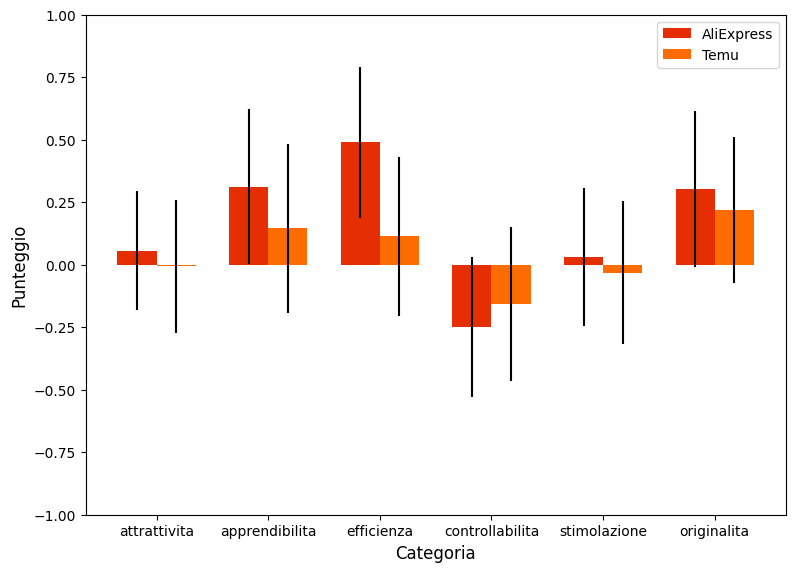



___________________________

Wilcoxon test on attrattivita:
	w: 2420.5
	p: 0.5884636658706313

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


___________________________

Wilcoxon test on apprendibilita:
	w: 929.5
	p: 0.24905171757641198

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


___________________________

Wilcoxon test on efficienza:
	w: 630.0
	p: 0.013148661608558843

P value is minor than alpha (0.05), we can reject H0
Basically the two systems DO NOT share the same distribution, there are differences! YAY


___________________________

Wilcoxon test on controllabilita:
	w: 825.5
	p: 0.4954516436370512

p value is greater than alpha (0.05), fail to reject H0
The result is statistically nonsignificant


___________________________

Wilcoxon test on stimolazione:
	w: 864.5
	p: 0.8722778844798923

p value is greater than alpha (0.05), fail to reject H0
The result is stat

In [6]:
# other interesting stats here:

categorie1 = {'attrattivita': [], 'apprendibilita': [], 'efficienza': [], 'controllabilita': [], 'stimolazione': [], 'originalita': []}

categorie1['attrattivita'].extend([int(x) - 4 for x in domande1.loc['fastidioso-piacevole'].tolist()])
categorie1['attrattivita'].extend([int(x) - 4 for x in domande1.loc['buono-scarso'].tolist()])
categorie1['attrattivita'].extend([int(x) - 4 for x in domande1.loc['repellente-attraente'].tolist()])
categorie1['attrattivita'].extend([int(x) - 4 for x in domande1.loc['sgradevole-gradevole'].tolist()])
categorie1['attrattivita'].extend([int(x) - 4 for x in domande1.loc['invitante-non invitante'].tolist()])
categorie1['attrattivita'].extend([int(x) - 4 for x in domande1.loc['congeniale-ostile'].tolist()])

categorie1['apprendibilita'].extend([int(x) - 4 for x in domande1.loc['incomprensibile-comprensibile'].tolist()])
categorie1['apprendibilita'].extend([int(x) - 4 for x in domande1.loc['facile da apprendere-difficile da apprendere'].tolist()])
categorie1['apprendibilita'].extend([int(x) - 4 for x in domande1.loc['non pragmatico-pragmatico'].tolist()])
categorie1['apprendibilita'].extend([int(x) - 4 for x in domande1.loc['ordinato-sovraccarico'].tolist()])

categorie1['efficienza'].extend([int(x) - 4 for x in domande1.loc['veloce-lento'].tolist()])
categorie1['efficienza'].extend([int(x) - 4 for x in domande1.loc['inefficiente-efficiente'].tolist()])
categorie1['efficienza'].extend([int(x) - 4 for x in domande1.loc['non pragmatico-pragmatico'].tolist()])
categorie1['efficienza'].extend([int(x) - 4 for x in domande1.loc['ordinato-sovraccarico'].tolist()])

categorie1['controllabilita'].extend([int(x) - 4 for x in domande1.loc['imprevedibile-prevedibile'].tolist()])
categorie1['controllabilita'].extend([int(x) - 4 for x in domande1.loc['ostruttivo-di supporto'].tolist()])
categorie1['controllabilita'].extend([int(x) - 4 for x in domande1.loc['sicuro-insicuro'].tolist()])
categorie1['controllabilita'].extend([int(x) - 4 for x in domande1.loc['conforme alle aspettatitve-non conforme alle aspettative'].tolist()])

categorie1['stimolazione'].extend([int(x) - 4 for x in domande1.loc['di grande valore-di poco valore'].tolist()])
categorie1['stimolazione'].extend([int(x) - 4 for x in domande1.loc['noioso-appassionante'].tolist()])
categorie1['stimolazione'].extend([int(x) - 4 for x in domande1.loc['non interessante-interessante'].tolist()])
categorie1['stimolazione'].extend([int(x) - 4 for x in domande1.loc['attivante-soporifero'].tolist()])

categorie1['originalita'].extend([int(x) - 4 for x in domande1.loc['creativo-privo di fantasia'].tolist()])
categorie1['originalita'].extend([int(x) - 4 for x in domande1.loc['originale-convenzionale'].tolist()])
categorie1['originalita'].extend([int(x) - 4 for x in domande1.loc['usuale-moderno'].tolist()])
categorie1['originalita'].extend([int(x) - 4 for x in domande1.loc['conservativo-innovativo'].tolist()])



categorie2 = {'attrattivita': [], 'apprendibilita': [], 'efficienza': [], 'controllabilita': [], 'stimolazione': [], 'originalita': []}

categorie2['attrattivita'].extend([int(x) - 4 for x in domande2.loc['fastidioso-piacevole'].tolist()])
categorie2['attrattivita'].extend([int(x) - 4 for x in domande2.loc['buono-scarso'].tolist()])
categorie2['attrattivita'].extend([int(x) - 4 for x in domande2.loc['repellente-attraente'].tolist()])
categorie2['attrattivita'].extend([int(x) - 4 for x in domande2.loc['sgradevole-gradevole'].tolist()])
categorie2['attrattivita'].extend([int(x) - 4 for x in domande2.loc['invitante-non invitante'].tolist()])
categorie2['attrattivita'].extend([int(x) - 4 for x in domande2.loc['congeniale-ostile'].tolist()])

categorie2['apprendibilita'].extend([int(x) - 4 for x in domande2.loc['incomprensibile-comprensibile'].tolist()])
categorie2['apprendibilita'].extend([int(x) - 4 for x in domande2.loc['facile da apprendere-difficile da apprendere'].tolist()])
categorie2['apprendibilita'].extend([int(x) - 4 for x in domande2.loc['non pragmatico-pragmatico'].tolist()])
categorie2['apprendibilita'].extend([int(x) - 4 for x in domande2.loc['ordinato-sovraccarico'].tolist()])

categorie2['efficienza'].extend([int(x) - 4 for x in domande2.loc['veloce-lento'].tolist()])
categorie2['efficienza'].extend([int(x) - 4 for x in domande2.loc['inefficiente-efficiente'].tolist()])
categorie2['efficienza'].extend([int(x) - 4 for x in domande2.loc['non pragmatico-pragmatico'].tolist()])
categorie2['efficienza'].extend([int(x) - 4 for x in domande2.loc['ordinato-sovraccarico'].tolist()])

categorie2['controllabilita'].extend([int(x) - 4 for x in domande2.loc['imprevedibile-prevedibile'].tolist()])
categorie2['controllabilita'].extend([int(x) - 4 for x in domande2.loc['ostruttivo-di supporto'].tolist()])
categorie2['controllabilita'].extend([int(x) - 4 for x in domande2.loc['sicuro-insicuro'].tolist()])
categorie2['controllabilita'].extend([int(x) - 4 for x in domande2.loc['conforme alle aspettatitve-non conforme alle aspettative'].tolist()])

categorie2['stimolazione'].extend([int(x) - 4 for x in domande2.loc['di grande valore-di poco valore'].tolist()])
categorie2['stimolazione'].extend([int(x) - 4 for x in domande2.loc['noioso-appassionante'].tolist()])
categorie2['stimolazione'].extend([int(x) - 4 for x in domande2.loc['non interessante-interessante'].tolist()])
categorie2['stimolazione'].extend([int(x) - 4 for x in domande2.loc['attivante-soporifero'].tolist()])

categorie2['originalita'].extend([int(x) - 4 for x in domande2.loc['creativo-privo di fantasia'].tolist()])
categorie2['originalita'].extend([int(x) - 4 for x in domande2.loc['originale-convenzionale'].tolist()])
categorie2['originalita'].extend([int(x) - 4 for x in domande2.loc['usuale-moderno'].tolist()])
categorie2['originalita'].extend([int(x) - 4 for x in domande2.loc['conservativo-innovativo'].tolist()])



df_categ1 = pd.DataFrame(index = [], columns = ['mean', 'std', 'interval', 'data'])
for categ in categorie1:
    df_categ1.loc[categ + ' - ' + app[0], 'mean'] = np.mean(categorie1[categ])
    df_categ1.loc[categ + ' - ' + app[0], 'std'] = np.std(categorie1[categ])
    df_categ1.loc[categ + ' - ' + app[0], 'interval'] = st.t.interval(0.95, len(categorie1[categ])-1, loc = np.mean(categorie1[categ]), scale = st.sem(categorie1[categ]))
    df_categ1.at[categ + ' - ' + app[0], 'data'] = categorie1[categ]

df_categ2 = pd.DataFrame(index = [], columns = ['mean', 'std', 'interval', 'data'])
for categ in categorie2:
    df_categ2.loc[categ + ' - ' + app[1], 'mean'] = np.mean(categorie2[categ])
    df_categ2.loc[categ + ' - ' + app[1], 'std'] = np.std(categorie2[categ])
    df_categ2.loc[categ + ' - ' + app[1], 'interval'] = st.t.interval(0.95, len(categorie2[categ])-1, loc = np.mean(categorie2[categ]), scale = st.sem(categorie2[categ]))
    df_categ2.at[categ + ' - ' + app[1], 'data'] = categorie2[categ]

display(df_categ1)
display(df_categ2)

fig = plt.figure(figsize = (7, 5), dpi = 100)
ax = fig.add_axes([0, 0, 1, 1])
X = np.arange(len(categorie1))
bar_width = 0.35
print()
yerr1 = abs(df_categ1['mean'] - [ele[1] for ele in df_categ1['interval']])
print(f'means {app[0]}')
display(df_categ1['mean'])
print(f'yerr {app[0]}')
display(df_categ1['interval'])
display(yerr1)

yerr2 = abs(df_categ2['mean'] - [ele[1] for ele in df_categ2['interval']])
print(f'means {app[1]}')
display(df_categ2['mean'])
print(f'yerr {app[1]}')
display(df_categ2['interval'])
display(yerr2)

ax.bar(X, df_categ1['mean'], yerr = yerr1, width = bar_width, label = app[0], color = palette_c[1])
ax.bar(X + bar_width, df_categ2['mean'], yerr = yerr2, width = bar_width, label = app[1], color = palette_c[3])
ax.set_xlabel('Categoria', fontsize = 12)
ax.set_ylabel('Punteggio', fontsize = 12)
ax.set_ylim([-1,1])
ax.set_xticks(X + bar_width /2)
ax.set_xticklabels([ele for ele in categorie1])
ax.legend()
# plt.grid()
plt.show()



# perform Wilcoxon on every category:
for categ in categorie1:
    print('\n\n___________________________\n')
    print(f'Wilcoxon test on {categ}:')
    x = df_categ1.loc[categ + ' - ' + app[0], 'data']
    y = df_categ2.loc[categ + ' - ' + app[1], 'data']
    w, p = wilcoxon(x = x, y = y, alternative='two-sided')
    print(f'\tw: {w}\n\tp: {p}\n')
    alpha = 0.05
    if p > alpha:
        print(f'p value is greater than alpha ({alpha}), fail to reject H0')
        print('The result is statistically nonsignificant')
    else:
        print(f'P value is minor than alpha ({alpha}), we can reject H0')
        print('Basically the two systems DO NOT share the same distribution, there are differences! YAY')
    


### NPS:

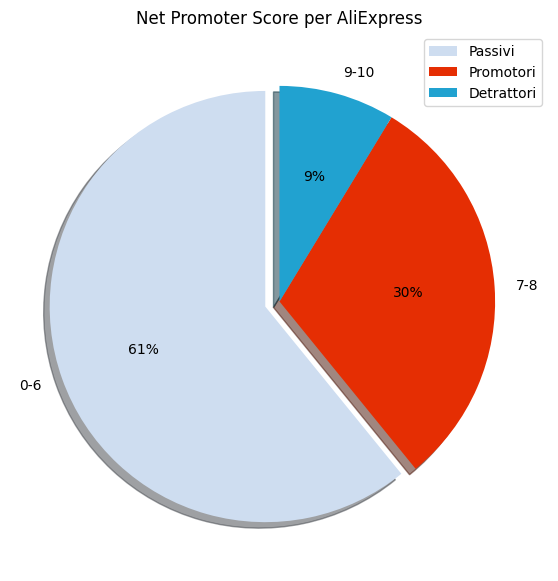

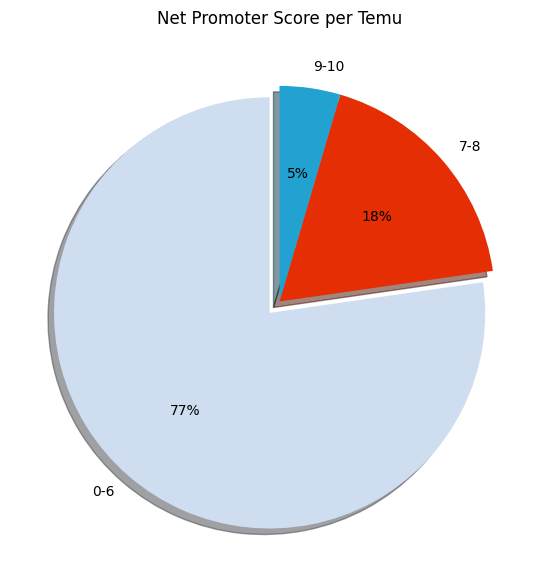

In [7]:
# get last row (NPS)
# detrattori 0-6 compresi
# passivi 7-8
# promotori 9-10
# NPS = % promotori - % detrattori

nps_class = [0, 7, 9, 10]
labels = ['0-6', '7-8', '9-10']
scores1 = [int(ele) for ele in questionario1.iloc[-1]]
scores2 = [int(ele) for ele in questionario2.iloc[-1]]
df_nps1 = pd.DataFrame({'score': scores1, 'group': pd.cut(scores1, bins = nps_class, labels = labels, right = False)})
#display(df_nps1)
df_nps2 = pd.DataFrame({'score': scores2, 'group': pd.cut(scores2, bins = nps_class, labels = labels, right = False)})
#display(df_nps2)

sizes1 = df_nps1['group'].value_counts()
#display(sizes1)
# sizes1 = sizes1[sizes != 0] # drop 0 value
sizes2 = df_nps2['group'].value_counts()
#display(sizes2)

# sizes2 = sizes2[sizes != 0] # drop 0 value

# plotting first system here
labels = list(sizes1.index)
# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes1))
explode[np.where(sizes1.index == sizes1.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes1, explode = explode, labels = labels, autopct='%1.0f%%', shadow = True, startangle = 90, colors = palette_c)
plt.title(f'Net Promoter Score per {app[0]}')
plt.legend(['Passivi', 'Promotori', 'Detrattori'])
plt.show()


# plotting second system here
labels = list(sizes2.index)
# trova il pezzo di torta più grande e lo risalta
explode = np.zeros(len(sizes2))
explode[np.where(sizes2.index == sizes2.idxmax())[0][0]] = 0.07

fig, ax = plt.subplots(figsize = (7, 7), dpi = 100)
ax.pie(sizes2, explode = explode, labels = labels, autopct='%1.0f%%', shadow = True, startangle = 90, colors = palette_c)
plt.title(f'Net Promoter Score per {app[1]}')
# TODO: controlla la correttezza della seconda legenda!!!
# plt.legend(['Passivi', 'Promotori', 'Detrattori'])
plt.show()

,score,perc
item,,
0-6,14,60.9
7-8,7,30.4
9-10,2,8.7



Il Net Promoter Score di AliExpress è: -52.2

____



,score,perc
item,,
0-6,17,77.3
7-8,4,18.2
9-10,1,4.5



Il Net Promoter Score di Temu è: -72.8

____



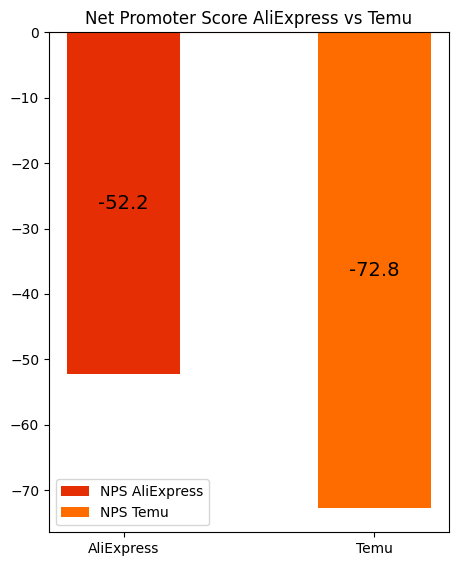

In [8]:
p_nps1 = pd.DataFrame(sizes1.items(), columns=['item', 'score'])
p_nps1['perc'] = np.around(p_nps1['score']/p_nps1['score'].sum()*100, 1)
p_nps1 = p_nps1.set_index('item')
display(p_nps1)
nps_1 = p_nps1.loc['9-10', 'perc'] - p_nps1.loc['0-6', 'perc']
print(f'\nIl Net Promoter Score di {app[0]} è: {nps_1}')

print('\n____\n')

p_nps2 = pd.DataFrame(sizes2.items(), columns=['item', 'score'])
p_nps2['perc'] = np.around(p_nps2['score']/p_nps2['score'].sum()*100, 1)
p_nps2 = p_nps2.set_index('item')
display(p_nps2)
nps_2 = p_nps2.loc['9-10', 'perc'] - p_nps2.loc['0-6', 'perc']
print(f'\nIl Net Promoter Score di {app[1]} è: {nps_2}')

print('\n____\n')

width = 0.45
fig = plt.figure(figsize = (4, 5), dpi = 100)
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(1, nps_1, width, label = f'NPS {app[0]}', color = palette_c[1])
plt.annotate(f'{nps_1}', (1, nps_1/2), ha='center', va='center', size = 14)

ax.bar(2, nps_2, width, label = f'NPS {app[1]}', color = palette_c[3])
plt.annotate(f'{nps_2}', (2, nps_2/2), ha='center', va='center', size = 14)

plt.axhline(y = 0,linewidth = 1.5, color='tab:orange')
plt.legend()
plt.title(f'Net Promoter Score {app[0]} vs {app[1]}')
plt.xticks([1, 2], app)
#plt.grid()
plt.show()